In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/X_train.csv')

In [3]:
df.head()

,PolicyId,AgeConducteur,SexeConducteur,StatutMatrimonial,BonusMalus,FrequencePaiement,CodeProfession,AgeVehicule,ClasseVehicule,PuissanceVehicule,CarburantVehicule,UsageVehicule,Garage,Region,PrimeCommerciale
0,90144365.100b,40.0,M,NaN,50.0,Half-yearly,NaN,6.0,Cheaper,P12,Diesel,Private+trip to office,Closed zbox,South West,350.0
1,90194873.100a,46.0,M,NaN,50.0,Annual,NaN,2.0,Cheap,P12,Diesel,Professional,Closed zbox,Headquarters,529.2
2,90134157.100a,37.0,M,NaN,50.0,Half-yearly,NaN,10.0,Cheaper,P10,Diesel,Private+trip to office,Closed zbox,Center,145.3
3,90109178.102a,51.0,M,Cohabiting,50.0,Annual,Private employee,5.0,Cheapest,P7,Regular,Private+trip to office,Closed zbox,Center,213.6
4,90170847.100a,29.0,M,NaN,80.0,Annual,NaN,10.0,Cheap,P13,Regular,Private+trip to office,Closed collective parking,Center,296.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           22481 non-null  object 
 1   AgeConducteur      22481 non-null  float64
 2   SexeConducteur     22481 non-null  object 
 3   StatutMatrimonial  7372 non-null   object 
 4   BonusMalus         22481 non-null  float64
 5   FrequencePaiement  22481 non-null  object 
 6   CodeProfession     7372 non-null   object 
 7   AgeVehicule        22481 non-null  float64
 8   ClasseVehicule     22481 non-null  object 
 9   PuissanceVehicule  22481 non-null  object 
 10  CarburantVehicule  22481 non-null  object 
 11  UsageVehicule      22481 non-null  object 
 12  Garage             22481 non-null  object 
 13  Region             22481 non-null  object 
 14  PrimeCommerciale   22481 non-null  float64
dtypes: float64(4), object(11)
memory usage: 2.6+ MB


In [41]:
df_test = pd.read_csv('../data/X_test.csv')

In [42]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636 entries, 0 to 9635
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PolicyId           9636 non-null   object 
 1   AgeConducteur      9636 non-null   int64  
 2   SexeConducteur     9636 non-null   object 
 3   StatutMatrimonial  3158 non-null   object 
 4   BonusMalus         9636 non-null   float64
 5   FrequencePaiement  9636 non-null   object 
 6   CodeProfession     3158 non-null   object 
 7   AgeVehicule        9636 non-null   int64  
 8   ClasseVehicule     9636 non-null   object 
 9   PuissanceVehicule  9636 non-null   object 
 10  CarburantVehicule  9636 non-null   object 
 11  UsageVehicule      9636 non-null   object 
 12  Garage             9636 non-null   object 
 13  Region             9636 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.0+ MB


In [43]:
df_test.shape

(9636, 14)

In [ ]:
df_test

In [5]:
df.isna().mean()*100

PolicyId              0.000000
AgeConducteur         0.000000
SexeConducteur        0.000000
StatutMatrimonial    67.207864
BonusMalus            0.000000
FrequencePaiement     0.000000
CodeProfession       67.207864
AgeVehicule           0.000000
ClasseVehicule        0.000000
PuissanceVehicule     0.000000
CarburantVehicule     0.000000
UsageVehicule         0.000000
Garage                0.000000
Region                0.000000
PrimeCommerciale      0.000000
dtype: float64

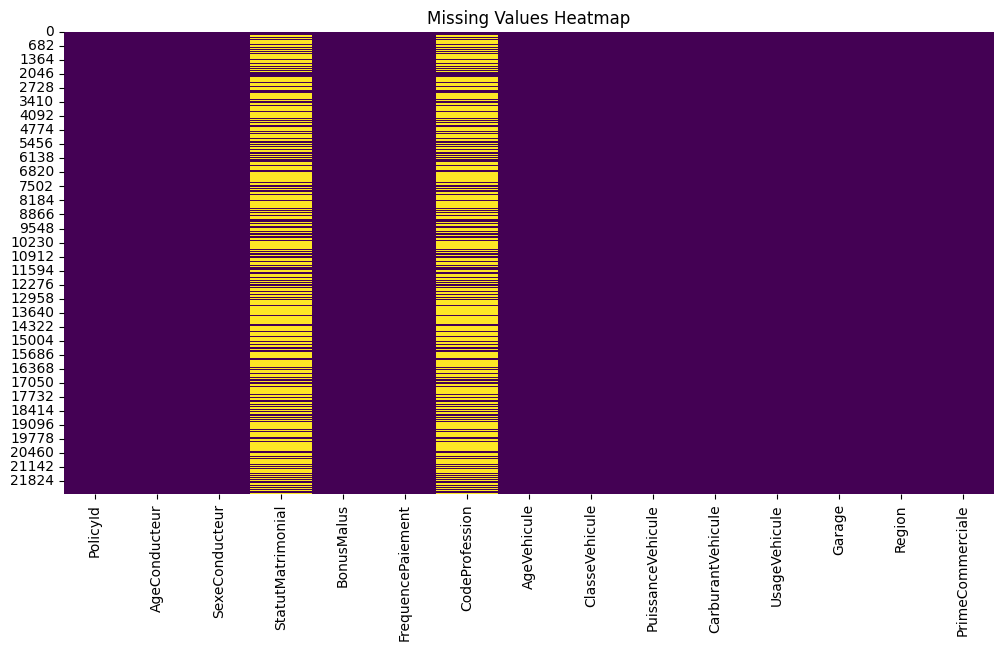

In [6]:
# visualization missing values with heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


In [7]:
df.duplicated().sum()

0

In [8]:
# dropping unnecessary columns
df = df.drop(['CodeProfession','StatutMatrimonial','PolicyId'], axis=1)

In [9]:
var_num = df.select_dtypes(include=['int64', 'float64'])
var_cat = df.select_dtypes(include=['object','category'])

In [10]:
# descriptive statistics
pd.DataFrame(var_num.describe().T)


,count,mean,std,min,25%,50%,75%,max
AgeConducteur,22481.0,39.719185,11.854692,18.0,31.0,37.0,47.0,87.0
BonusMalus,22481.0,63.242471,15.381818,50.0,50.0,57.0,72.0,156.0
AgeVehicule,22481.0,7.505805,4.848366,0.0,4.0,7.0,10.0,89.0
PrimeCommerciale,22481.0,420.786077,219.261080,91.0,264.8,375.1,521.3,2902.3


In [11]:
pd.DataFrame(var_cat.describe().T)

,count,unique,top,freq
SexeConducteur,22481,2,M,14809
FrequencePaiement,22481,4,Half-yearly,12486
ClasseVehicule,22481,9,Cheapest,7839
PuissanceVehicule,22481,15,P10,4018
CarburantVehicule,22481,2,Regular,13600
UsageVehicule,22481,3,Private+trip to office,21830
Garage,22481,4,Closed zbox,11311
Region,22481,4,Center,11946


# Analysis

In [34]:
var_num = var_num.drop(['PrimeCommerciale'], axis=1)

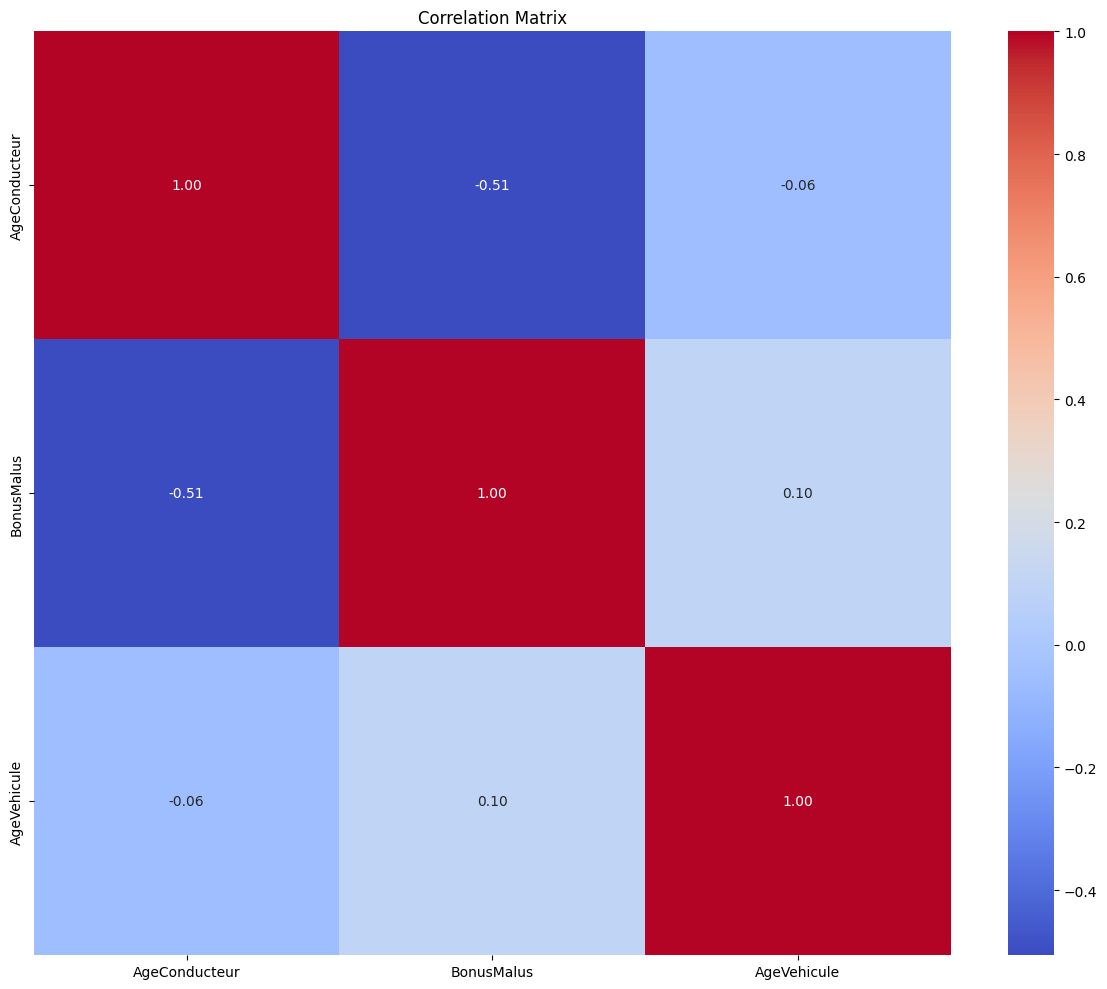

In [35]:
# Visualizing correlation matrix
plt.figure(figsize=(12, 10))
corr = var_num.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


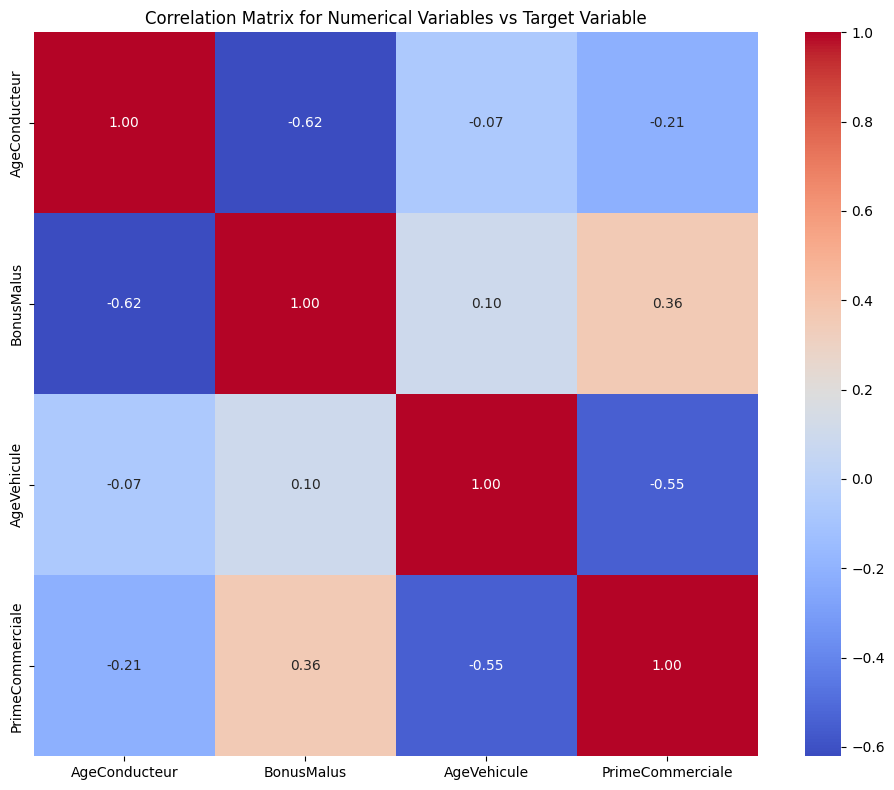

In [36]:
# Matrix correlation with target variable
plt.figure(figsize=(10, 8)) 
corr_target = var_num.copy()
corr_target['PrimeCommerciale'] = df['PrimeCommerciale']
corr = corr_target.corr('spearman')
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix for Numerical Variables vs Target Variable')
plt.tight_layout()
plt.show()

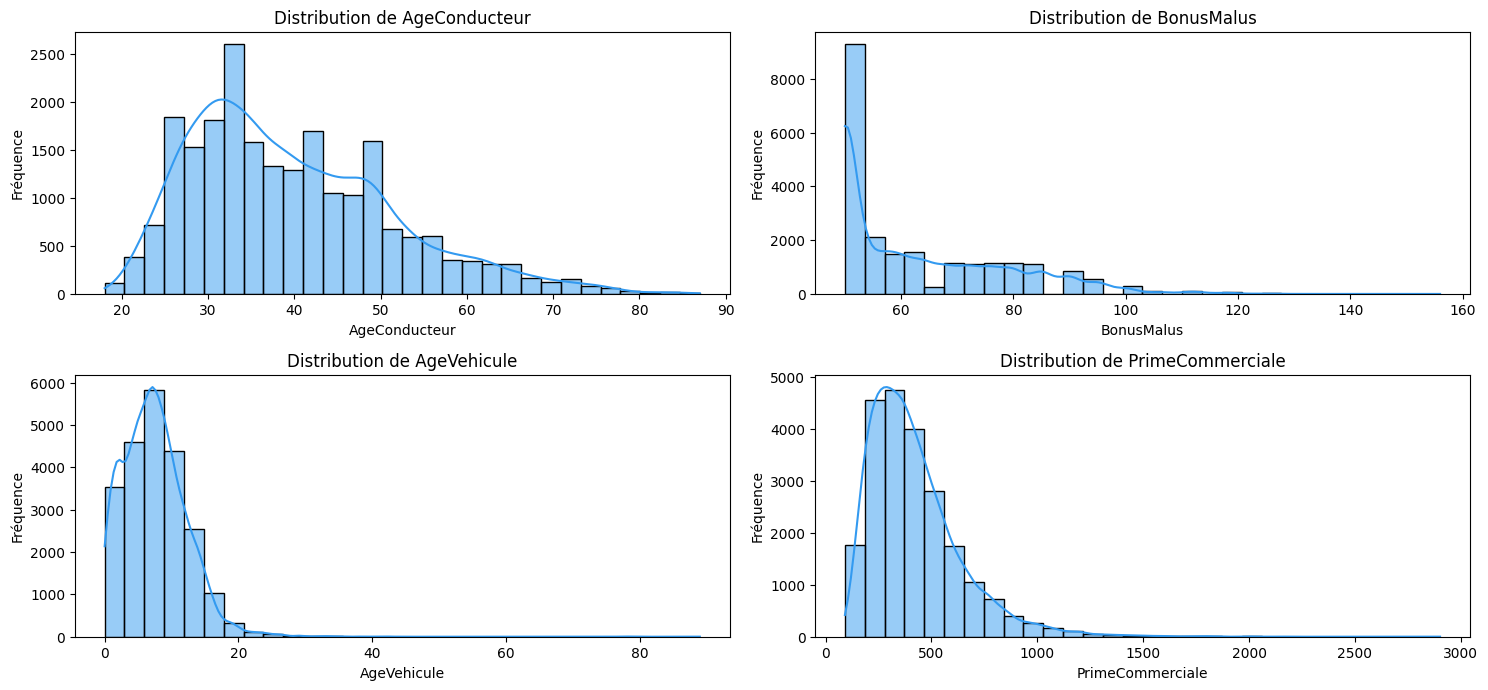

In [13]:
# Display distribution of numerical variables

plt.figure(figsize=(15, 10))
for i, column in enumerate(var_num, 1):
    plt.subplot(3, 2, i)  # 2 lignes, 2 colonnes
    sns.histplot(var_num[column], kde=True, bins=30 , color='#339af0')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()

In [14]:
# Normality test using Shapiro-Wilk
from scipy.stats import shapiro
from scipy.stats import kstest
results = []

for col in var_num.columns:
    data = df[col].dropna()

    # Normalization 
    data_norm = (data - data.mean()) / data.std()

    # KS test vs normal distribution
    ks_stat, p_value = kstest(data_norm, 'norm')

    # Conclusion on normality
    is_normal = "Yes" if p_value >= 0.05 else "No"

    results.append([col, ks_stat, p_value, is_normal])

# Final results DataFrame
ks_df = pd.DataFrame(results, columns=["Variable", "KS_statistic", "p_value", "Is_Normal"])
ks_df

,Variable,KS_statistic,p_value,Is_Normal
0,AgeConducteur,0.094513,3.162664e-175,No
1,BonusMalus,0.194642,0.000000e+00,No
2,AgeVehicule,0.080197,3.248938e-126,No
3,PrimeCommerciale,0.092804,5.957857e-169,No


In [15]:
df.shape

(22481, 12)

# Dat Quality

In [16]:
df['ClasseVehicule'].value_counts()

ClasseVehicule
Cheapest          7839
Cheaper           6514
Cheap             3893
Medium low        2419
Medium             847
Medium high        592
Expensive          246
More expensive      94
Most expensive      37
Name: count, dtype: int64

In [17]:
# Replacing similar categories 
df['ClasseVehicule'] = df['ClasseVehicule'].replace({'Cheaper': 'Cheap', 'Cheapest': 'Cheap','Most expensive': 'Expensive','More expensive': 'Expensive'})

In [18]:
df['ClasseVehicule'].value_counts()

ClasseVehicule
Cheap          18246
Medium low      2419
Medium           847
Medium high      592
Expensive        377
Name: count, dtype: int64

In [19]:
df['PuissanceVehicule'].value_counts().reset_index().sort_values(by='PuissanceVehicule', ascending=False)

,PuissanceVehicule,count
3,P9,2914
5,P8,2220
8,P7,413
14,P6,2
10,P5,252
12,P4,21
13,P2,9
11,P17,23
9,P16,302
7,P15,635


In [22]:
var_cat.columns

Index(['SexeConducteur', 'FrequencePaiement', 'ClasseVehicule',
       'PuissanceVehicule', 'CarburantVehicule', 'UsageVehicule', 'Garage',
       'Region'],
      dtype='object')

In [23]:
var_num.columns

Index(['AgeConducteur', 'BonusMalus', 'AgeVehicule', 'PrimeCommerciale'], dtype='object')

In [30]:
df['Garage'].value_counts().reset_index().sort_values(by='Garage', ascending=False)

,Garage,count
3,Street,3167
2,Opened collective parking,3770
0,Closed zbox,11311
1,Closed collective parking,4233


In [29]:
df['FrequencePaiement'].value_counts().reset_index().sort_values(by='FrequencePaiement', ascending=False)

,FrequencePaiement,count
2,Quarterly,1709
3,Monthly,606
0,Half-yearly,12486
1,Annual,7680


In [27]:
pd.DataFrame(df.groupby(['SexeConducteur'])['AgeConducteur'].mean())

,AgeConducteur
SexeConducteur,
F,37.976017
M,40.622257


In [28]:
pd.DataFrame(df.groupby(['PuissanceVehicule'])['AgeConducteur'].mean())

,AgeConducteur
PuissanceVehicule,
P10,38.330762
P11,39.175307
P12,40.372755
P13,40.874116
P14,42.507025
P15,43.954331
P16,45.152318
P17,42.521739
P2,41.555556


In [39]:
import itertools
from scipy.stats import chi2_contingency

# Chi-square test between categorical variables

chi2_cat_results = []
cat_cols = list(var_cat.columns)

# Test all pairs of categorical variables
for col1, col2 in itertools.combinations(cat_cols, 2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    try:
        # Perform chi-square test
        chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
        
        # Determine significance
        is_significant = "Yes" if p_value < 0.05 else "No"
        
        chi2_cat_results.append([f"{col1} vs {col2}", chi2_stat, p_value, dof, is_significant])
    except Exception as e:
        chi2_cat_results.append([f"{col1} vs {col2}", np.nan, np.nan, np.nan, "Error"])

# Create results DataFrame
chi2_cat_df = pd.DataFrame(chi2_cat_results, columns=["Variable Pair", "Chi2_statistic", "p_value", "DOF", "Significant_0.05"])
chi2_cat_df = chi2_cat_df.sort_values('p_value')

chi2_cat_df

,Variable Pair,Chi2_statistic,p_value,DOF,Significant_0.05
13,ClasseVehicule vs PuissanceVehicule,25857.416802,0.000000e+00,56,Yes
2,SexeConducteur vs PuissanceVehicule,1812.027938,0.000000e+00,14,Yes
18,PuissanceVehicule vs CarburantVehicule,4382.438825,0.000000e+00,14,Yes
14,ClasseVehicule vs CarburantVehicule,876.559330,1.996645e-188,4,Yes
20,PuissanceVehicule vs Garage,826.680576,2.819080e-146,42,Yes
1,SexeConducteur vs ClasseVehicule,607.772260,3.221575e-130,4,Yes
3,SexeConducteur vs CarburantVehicule,565.287494,5.948684e-125,1,Yes
16,ClasseVehicule vs Garage,537.475632,2.313329e-107,12,Yes
27,Garage vs Region,510.989301,2.548250e-104,9,Yes
11,FrequencePaiement vs Garage,463.801675,3.208009e-94,9,Yes


In [37]:
# ANOVA test for categorical variables vs target variable
import scipy.stats as stats
from scipy.stats import f_oneway

anova_cat_results = []

for col in var_cat.columns:
    # Get unique categories
    categories = df[col].unique()
    
    # Create groups for each category
    groups = []
    for cat in categories:
        # Get target values for this category
        group_values = df['PrimeCommerciale'][df[col] == cat].values
        groups.append(group_values)
    
    try:
        # Perform ANOVA test
        f_stat, p_value = f_oneway(*groups)
        
        # Determine significance
        is_significant = "Yes" if p_value < 0.05 else "No"
        
        anova_cat_results.append([col, f_stat, p_value, is_significant])
    except Exception as e:
        anova_cat_results.append([col, np.nan, np.nan, "Error"])

# Create results DataFrame
anova_cat_df = pd.DataFrame(anova_cat_results, columns=["Variable", "F_statistic", "p_value", "Significant_0.05"])
anova_cat_df = anova_cat_df.sort_values('p_value')

anova_cat_df

,Variable,F_statistic,p_value,Significant_0.05
2,ClasseVehicule,914.644312,0.000000e+00,Yes
3,PuissanceVehicule,485.218963,0.000000e+00,Yes
1,FrequencePaiement,460.110832,3.691306e-290,Yes
4,CarburantVehicule,1087.400150,6.325473e-233,Yes
7,Region,191.225407,1.851552e-122,Yes
0,SexeConducteur,232.184832,3.628345e-52,Yes
5,UsageVehicule,118.327608,7.578940e-52,Yes
6,Garage,39.496099,1.903016e-25,Yes
